In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from adc64format import dtypes, ADC64Reader

In [2]:
filename = '/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST.h5'
#filename = '/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST_events_3.h5'
file = h5py.File(filename)

In [9]:
np.arange(len(file['packets']))

array([       0,        1,        2, ..., 32918535, 32918536, 32918537])

In [10]:
file['packets']

<HDF5 dataset "packets": shape (32918538,), type "|V36">

In [7]:
file['packets'][2]

(2, 0, 0, 4, 0, 0, 0, 0, 1617489694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [11]:
file['packets'].dtype

dtype([('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4')])

In [13]:
packets = file['packets']
new_dtype = np.dtype([('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4'), ('index', 'u8')])
new_packets = packets.astype(new_dtype)


In [19]:
new_packets['index'] = np.arange(0, len(packets), 1)

TypeError: 'AstypeWrapper' object does not support item assignment

In [31]:
packet_type = packets['packet_type']
timestamps = packets['timestamp']
mask = packets['packet_type'] == 4
indices = np.where(mask)[0]

rep_count = np.diff(np.concatenate(([0], indices, [len(packet_type)])))
print(rep_count[0:20])
rep_vals = np.repeat(timestamps[indices], rep_count[:-1])

new_array = np.zeros_like(packet_type)
new_array[~mask] = rep_vals

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4]


ValueError: NumPy boolean array indexing assignment cannot assign 32918536 input values to the 30825014 output values where the mask is true

In [14]:
np.repeat([1,1,1],[2,2,2])

array([1, 1, 1, 1, 1, 1])

In [4]:
packet_type = packets['packet_type']
timestamps = packets['timestamp']
mask = packets['packet_type'] == 4
indices = np.where(mask)[0]
rep_count = np.diff(indices)

In [13]:
np.array([1.2,4.5]).astype('int')

array([1, 4])

In [5]:
rep_vals = np.repeat(timestamps[indices][:-1], rep_count)

In [8]:
x = np.array([4,0,0,0,0,4,0,4,0,0,4,0,0,0,0,0,0,4])
y = np.array([100,1,2,3,4,101,5,102,6,7,103,8,9,10,11,12,13,104])
mask = x == 4
indices = np.where(mask)[0]
rep_count = np.diff(indices)
rep_vals = np.repeat(y[indices][:-1], rep_count)
print(rep_vals)



[100 100 100 100 100 101 101 102 102 102 103 103 103 103 103 103 103]


In [47]:
print(packet_type[77641:77671])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0]


In [48]:
print(timestamps[77641:77671])

[  58720283         52         63         29         24         48
         25         61   58720311         25         17         57
         29         31       3024         32   58720273         54
      73488         31 1617489694    9632043 1617489695         30
         65         23     168956   58720301         22         47]


In [49]:
print(rep_vals[77641:77671])

[1617489695 1617489695 1617489695 1617489695 1617489695 1617489695
 1617489695 1617489695 1617489695 1617489695 1617489695 1617489695
 1617489695 1617489695 1617489695 1617489695 1617489695 1617489695
 1617489695 1617489695 1617489694 1617489694 1617489695 1617489695
 1617489695 1617489695 1617489695 1617489695 1617489695 1617489695]


In [54]:
np.where(timestamps >= 1617489696)[0]

array([  150268,   150286,   150307, ..., 32918532, 32918534, 32918536])

(1617489700.0, 1617489750.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
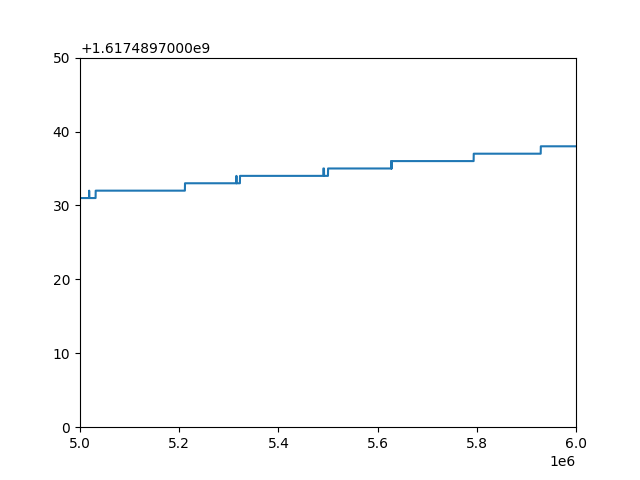

In [7]:
%matplotlib widget
plt.plot(rep_vals)
plt.xlim(0.5e7, 0.6e7)
plt.ylim(700+1.617489e9, 750+1.617489e9)

In [14]:
event_dtype = np.dtype([('nhit', '<u1'), ('q', '<f8'),('t', '<f8'),('x', '<f8'),('y', '<f8'),('z', '<f8')])
x = np.zeros((1,), dtype=event_dtype)

In [25]:
arrays = dict()
np.savez('arrays.npz', [x,x,x])

{}

In [34]:
x = np.array([1,2,3,4,5])
thisdict = {str(i):x for i in range(0,5)}
thisdict[]

{'0': array([1, 2, 3, 4, 5]),
 '1': array([1, 2, 3, 4, 5]),
 '2': array([1, 2, 3, 4, 5]),
 '3': array([1, 2, 3, 4, 5]),
 '4': array([1, 2, 3, 4, 5])}

In [48]:
packets_dtype = np.dtype([('q', '<f8'),('t', '<f8'),('x', '<f8'),('y', '<f8'),('z', '<f8')])
event_packets = np.zeros(1, dtype=[('q', '<f8'),('t', '<f8'),('x', '<f8'),('y', '<f8'),('z', '<f8')])
event_packets['q']

array([0.])

In [55]:
{'0': np.zeros(1, dtype=[('q', '<f8'),('h', '<f8')])}

{'0': array([(0., 0.)], dtype=[('q', '<f8'), ('h', '<f8')])}

In [35]:
np.savez('arrays.npz', **thisdict)

In [36]:
npz_file = np.load('arrays.npz')

In [37]:
npz_file.files

['0', '1', '2', '3', '4']

In [39]:
npz_file['0']

array([1, 2, 3, 4, 5])

In [29]:
npz_file['arr_0']

array([[(0, 0., 0., 0., 0., 0.)],
       [(0, 0., 0., 0., 0., 0.)],
       [(0, 0., 0., 0., 0., 0.)]],
      dtype=[('nhit', 'u1'), ('q', '<f8'), ('t', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [21]:
with np.load('arrays.npz') as npz_file:
    npz_file['arr0'] = x

TypeError: 'NpzFile' object does not support item assignment

In [19]:
np.concatenate((x, x))['nhit']

array([0, 0], dtype=uint8)

(array([ 49., 655., 694., 478., 429., 343., 303., 255., 258., 230., 259.,
        198., 177., 184., 143., 166., 139., 171., 143., 151., 157., 113.,
        118., 113., 140., 129., 100., 125., 113.,  98., 122.,  84.,  84.,
         74.,  65.,  65.,  59.,  59.,  72.,  47.,  67.,  52.,  51.,  47.,
         51.,  55.,  37.,  34.,  25.,  31.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
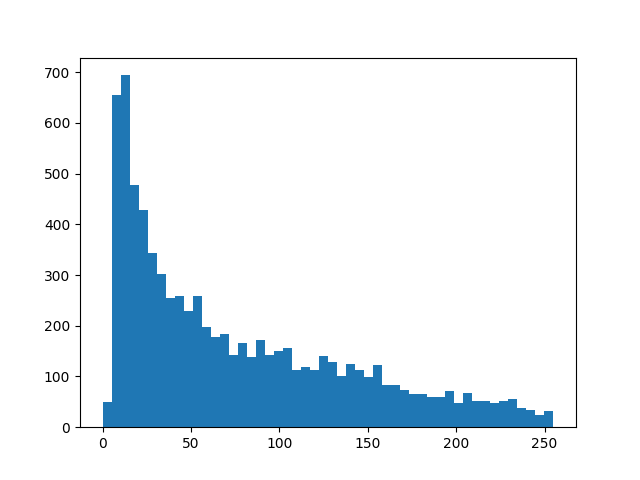

In [12]:
nhit_tracks = file['large_clusters']['nhit']
%matplotlib widget
plt.hist(nhit_tracks, bins=50)

(array([7.990e+02, 1.177e+03, 7.800e+02, 5.990e+02, 5.120e+02, 4.450e+02,
        3.680e+02, 3.590e+02, 3.640e+02, 3.520e+02, 3.230e+02, 2.620e+02,
        2.190e+02, 1.750e+02, 1.710e+02, 1.230e+02, 1.330e+02, 9.700e+01,
        9.000e+01, 7.200e+01, 5.700e+01, 4.300e+01, 3.900e+01, 3.900e+01,
        2.200e+01, 2.100e+01, 2.100e+01, 1.300e+01, 8.000e+00, 1.400e+01,
        1.000e+01, 1.500e+01, 1.200e+01, 9.000e+00, 4.000e+00, 7.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000., 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
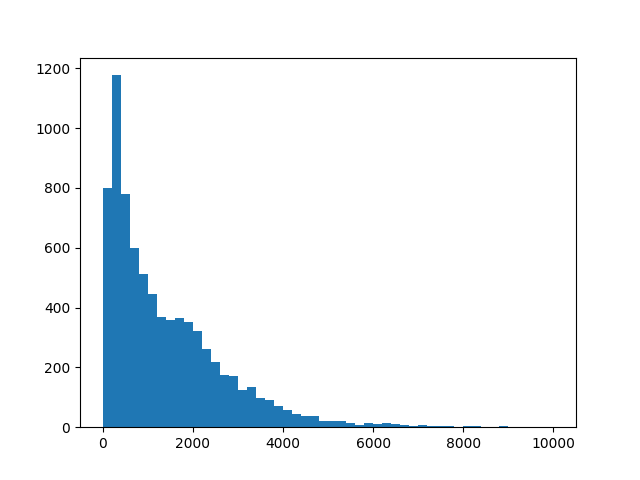

In [14]:
q_tracks = file['large_clusters']['q']
%matplotlib widget
plt.hist(q_tracks, bins=50, range=(0,10000))
